In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
train = pd.read_csv('house_data/house_train.csv')
test = pd.read_csv('house_data/house_test.csv')

In [7]:
train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
15031,15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
15032,15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
15033,15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200


In [8]:
test

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,15208,20140512T000000,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
1,15209,20150312T000000,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
2,15210,20150124T000000,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
3,15211,20141205T000000,2,1.00,1200,9850,1.0,0,0,4,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
4,15212,20140514T000000,4,1.75,1620,4980,1.0,0,0,4,7,860,760,1947,0,98133,47.7025,-122.341,1400,4980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6550,21758,20141002T000000,4,2.75,2770,3852,2.0,0,0,3,8,2770,0,2014,0,98178,47.5001,-122.232,1810,5641
6551,21759,20150416T000000,3,2.25,1190,1200,3.0,0,0,3,8,1190,0,2008,0,98103,47.6542,-122.346,1180,1224
6552,21760,20141015T000000,5,3.75,4470,8088,2.0,0,0,3,11,4470,0,2008,0,98004,47.6321,-122.200,2780,8964
6553,21761,20150126T000000,3,2.00,1490,1126,3.0,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [14]:
X_all = train.drop(['price'], axis=1)
y = train['price']
print(type(X_all), type(y), X_all.shape, y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> (15035, 20) (15035,)


In [15]:
from sklearn.preprocessing import MinMaxScaler

In [179]:
sel = ['sqft_living', 'sqft_lot', 'bedrooms','bathrooms',
       'grade','sqft_above','sqft_basement','condition',
       'view','zipcode','lat','long','waterfront','yr_built']  # 'bedrooms' , 'bathrooms', 
X = X_all[sel]
y = train['price']
nor_X = MinMaxScaler().fit_transform(X)  # 입력 데이터 정규화
print("정규화 : ", nor_X.shape, y.shape)

정규화 :  (15035, 14) (15035,)


In [180]:
# 정규화 데이터 사용
X_train, X_test, y_train, y_test = train_test_split(nor_X, y, 
                                                    random_state=42)
# 정규화 데이터 사용 안함.
# X_train, X_test, y_train, y_test = train_test_split(X, y, 
#                                                    random_state=42)

In [181]:
model = RandomForestRegressor(n_estimators=5, random_state=2)

In [182]:
print( model.fit(X_train, y_train) )
print( model.score(X_train, y_train))
print( model.score(X_test, y_test))

RandomForestRegressor(n_estimators=5, random_state=2)
0.9653521961309331
0.8376420731105786


In [21]:
# 학습된 랜덤포레스트의 트리 모델
print(model.estimators_)
print(model.score)
print("\n\n{}".format(model.base_estimator))
print("부트스트랩 : {}".format(model.bootstrap))
print("노드 분할 기준 : {}".format(model.criterion))

[DecisionTreeRegressor(max_features='auto', random_state=1872583848), DecisionTreeRegressor(max_features='auto', random_state=794921487), DecisionTreeRegressor(max_features='auto', random_state=111352301), DecisionTreeRegressor(max_features='auto', random_state=1853453896), DecisionTreeRegressor(max_features='auto', random_state=213298710)]
<bound method RegressorMixin.score of RandomForestRegressor(n_estimators=5, random_state=2)>


DecisionTreeRegressor()
부트스트랩 : True
노드 분할 기준 : mse


In [22]:
# model : 모델
# n_features : feature(변수의 개수)
# feature_names : 특성의 이름
def plot_feature_important_up(model, n_features, feature_names):
  imp = model.feature_importances_     # feature의 중요도
  plt.barh(range(n_features) , imp, align='center')  # 그래프(가로 막대 그래프)
  plt.yticks(np.arange(n_features), feature_names)  #y축의 축의 값
  plt.xlabel("feature importance")   # x축 레이블(제목)
  plt.ylabel("feature")              # y축 제목
  plt.ylim(-1, n_features)           # y축의 범위 지정

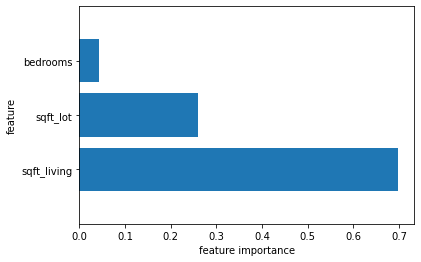

In [23]:
feature_names = sel
n_features = X.shape[1]
plot_feature_important_up(model, n_features, feature_names)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(nor_X, y, random_state=42)
model_5 = RandomForestRegressor(n_estimators=5, random_state=2)  # 5개의 트리 
model_5.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=2)

In [25]:
print( model_5.score(X_train, y_train))
print( model_5.score(X_test, y_test))

0.8922137121180739
0.37937640288308927


In [26]:
n_features = X.shape[1]

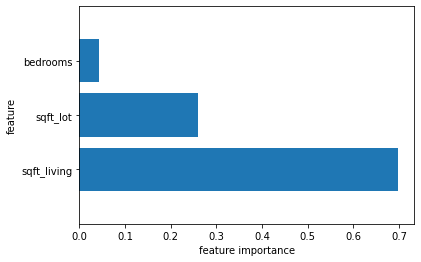

In [27]:
plot_feature_important_up(model, n_features, feature_names)

In [28]:
model_100 = RandomForestRegressor(n_estimators=100, random_state=2)  # 100개의 트리 
model_100.fit(X_train, y_train)
print( model_100.score(X_train, y_train))
print( model_100.score(X_test, y_test))

0.9341193749716377
0.45105945624970734


In [29]:
n_features = X_train.shape[1]
n_features

3

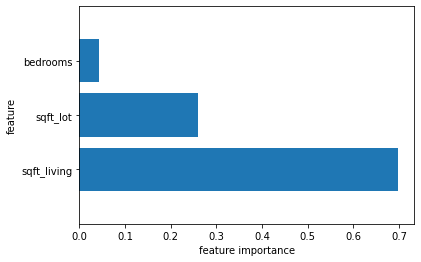

In [30]:
plot_feature_important_up(model, n_features, feature_names)

In [31]:
for model in model_5.estimators_:
    model.fit(X_train, y_train)
    print("훈련 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
    print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.074
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.056
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.087
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.059
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.069


In [32]:
cnt = 1
for model in model_100.estimators_:
    model.fit(X_train, y_train)
    if cnt % 10 == 0:
        print("훈련 세트 정확도 : {:.3f}".format(model.score(X_train, y_train)))
        print("테스트 세트 정확도 : {:.3f}".format(model.score(X_test, y_test)))
    cnt += + 1

훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.039
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.071
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.090
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.050
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.044
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.092
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.066
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.074
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.058
훈련 세트 정확도 : 0.997
테스트 세트 정확도 : 0.061
